In [1]:
%%capture
!pip install opencv-python
!pip install scipy
!pip install PyWavelets
!pip install scikit-image
!pip install toolz
!pip install mahotas

# Transform- and Entropy-based Methods
Transform methods represent an image in a space (such as
the frequency or the scale space) whose coordinate system
has an interpretation closely related to the characteristics of a
texture.

In [2]:
import os 

# Utils
import matplotlib.pyplot as plt
import cv2
from skimage.feature import graycomatrix, graycoprops
from skimage import data, io
from toolz.functoolz import compose_left
from itertools import product

int_product = lambda *ints: product(*tuple(map(range, ints)))


# methods
## Transform-based
from transform_based.lte import lte  # Law's texture Energy
from transform_based.fps import fps  # Fouriier Power Spectrum
from transform_based.gt import gt    # Gabor Transformation
from transform_based.dwt import dwt  # Discrete Wavelet Transfor
## Entropy-based
from entropy_based.fos import fos    # First Order Statistics
from entropy_based.glcm import glcm  # Gray Level Co-occurence Matrix



## Law's Texture Energy Measures (LTE/TEM)
This feature extraction method involves the application of
simple filters to digital images. It is based on two steps. First,
several 1D arrays convolved together in a combi-
natorial way are used to generate twenty-five masks

In [3]:
# Read in the image and convert it to grayscale
data_dir = './data/BoWFireDataset/'
train_dir = data_dir + 'train/'

labels = ['fire', 'normal', 'smoke']
n_labels = len(labels)
n_per_label = 5
img_offset = 4
img_paths = [f'{train_dir}{label}{img_offset+i+1:02d}.jpg' for label in labels for i in range(n_per_label)]

load_img = compose_left(
    cv2.imread,
    lambda img: cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
)

imgs = list(map(load_img, img_paths))
img_names = [path.rsplit('/', 1)[1].split('.')[0] for path in img_paths]

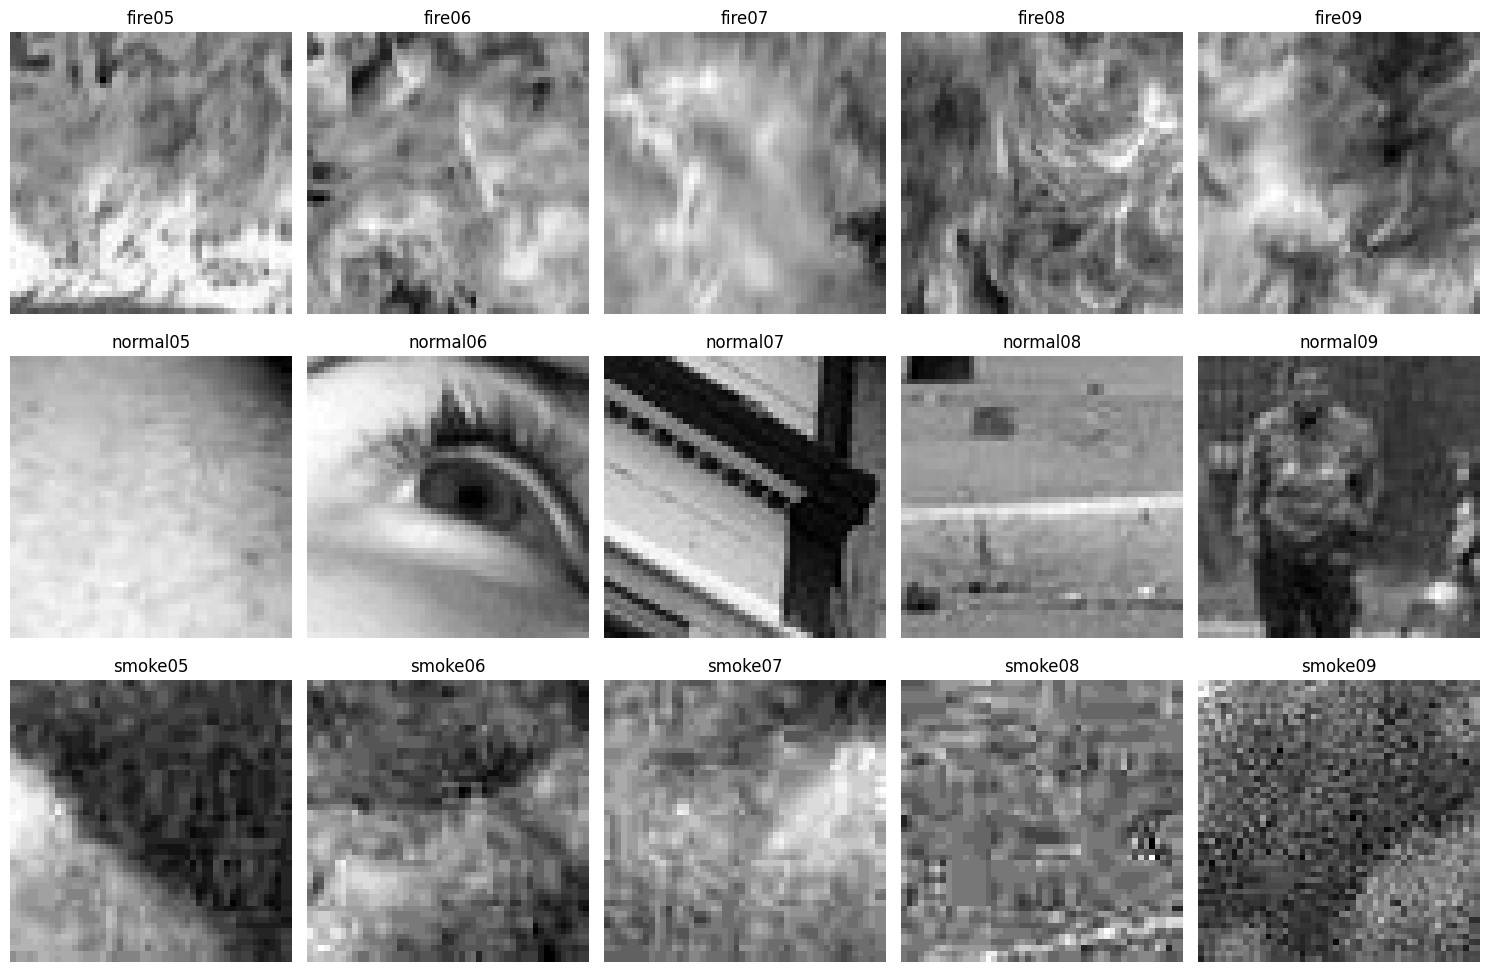

In [4]:
def visualize(imgs, n_labels=n_labels, n_per_label=n_per_label):
    fig, axes = plt.subplots(n_labels, n_per_label, figsize=(15, 10))
    
    for i, j in int_product(n_labels, n_per_label):
        index = i * n_per_label + j
        if index < len(imgs):
            axes[i, j].imshow(imgs[index], cmap='gray')
            axes[i, j].set_title(img_names[index])
            axes[i, j].axis('off')
            
    plt.tight_layout()
    plt.show()
visualize(imgs)

In [5]:
methods = {
    'fps': fps,
    'lte': lte,
    'gt': gt,
    'dwt': dwt,
    'fos': fos,
    'glcm': glcm,
}

results = {}
for method_name, method in methods.items():
    for img in imgs:
        result = method(img, None)
        results.setdefault(method_name, []).append(result)

In [13]:
for method_name, method_results in results.items():
    print(f'\n{method_name + ':':<13} {method_results[0][1]}')
    if len(method_results[0]) > 2:
        print('...:', method_results[0][2:])
    for index, result in enumerate(method_results):
        normalized = list(map(lambda n: round(n, 2), result[0]))
        #index = i * n_per_label + j
        print(f" - {img_names[index] + ':':<10} {normalized}")


fps:          ['FPS_RadialSum', 'FPS_AngularSum']
 - fire05:    [9092.23, 1362.43]
 - fire06:    [8595.44, 602.82]
 - fire07:    [8900.97, 657.47]
 - fire08:    [8153.39, 881.41]
 - fire09:    [6391.26, 802.68]
 - normal05:  [9607.65, 783.57]
 - normal06:  [5986.85, 2187.09]
 - normal07:  [5804.62, 2848.41]
 - normal08:  [5513.74, 655.18]
 - normal09:  [3104.99, 698.66]
 - smoke05:   [6062.78, 234.17]
 - smoke06:   [6133.14, 137.95]
 - smoke07:   [6015.33, 92.69]
 - smoke08:   [853.66, 55.83]
 - smoke09:   [3239.04, 297.45]

lte:          ['LTE_LL_7', 'LTE_EE_7', 'LTE_SS_7', 'LTE_LE_7', 'LTE_ES_7', 'LTE_LS_7']
 - fire05:    [111218.59, 2232.85, 472.64, 11545.62, 983.43, 4633.67]
 - fire06:    [59531.84, 1514.21, 266.68, 8497.36, 611.2, 2835.06]
 - fire07:    [56930.58, 1021.91, 150.57, 5990.9, 369.12, 1818.9]
 - fire08:    [74469.95, 1825.85, 368.04, 9882.57, 778.68, 3642.0]
 - fire09:    [75585.0, 1144.79, 221.89, 6604.5, 475.51, 2060.79]
 - normal05:  [58324.12, 423.3, 93.12, 2256.8